# Bank Customer Churn Prediction

In [2]:

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the pyplot module from the matplotlib library for plotting graphs
from matplotlib import pyplot as plt

# Import the numpy library for numerical operations
import numpy as np

# Import Seaborn library for advanced data visualization
import seaborn as sns  

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

# Machine learning library in Python that provides a wide range of tools for building and deploying machine learning models.
import sklearn




In [3]:
# Loading dataset into dataFrame
df = pd.read_csv("Bank_customer_data.csv")

In [4]:
# Displaying the first few rows of the dataset to understand its structure
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
"""
Dropping these columns helps the model to focus on the features that are truly predictive of customer churn, 
improving both the performance and interpretability of your machine learning models.
CustomerId: If included, the model might treat each customer ID as a unique and significant factor, which could confuse the model and lead to poor generalization.
RowNumber: Similarly, the row number is just the sequence in which data is stored and carries no meaningful information about the customer.
Surname: While surnames might suggest familial relations or regional information, in most cases, they do not provide actionable insights for churn prediction.
"""
# Dropping the 'CustomerId', 'RowNumber', and 'Surname' columns from the DataFrame 'df'
# axis='columns' specifies that we're dropping columns (not rows)
# inplace=True means the changes will be applied directly to the original DataFrame without returning a new DataFrame

df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Displaying the data types of each column in the DataFrame 'df'
# This helps in understanding the type of data each column holds, such as int64, float64, object (for strings), etc.

df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Data Analysis

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Displaying the number of unique values for each column in the DataFrame 'df'
# This helps in understanding the diversity of data in each column, which is useful for identifying categorical features and potential preprocessing steps
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

##### Plotting Pie Chart

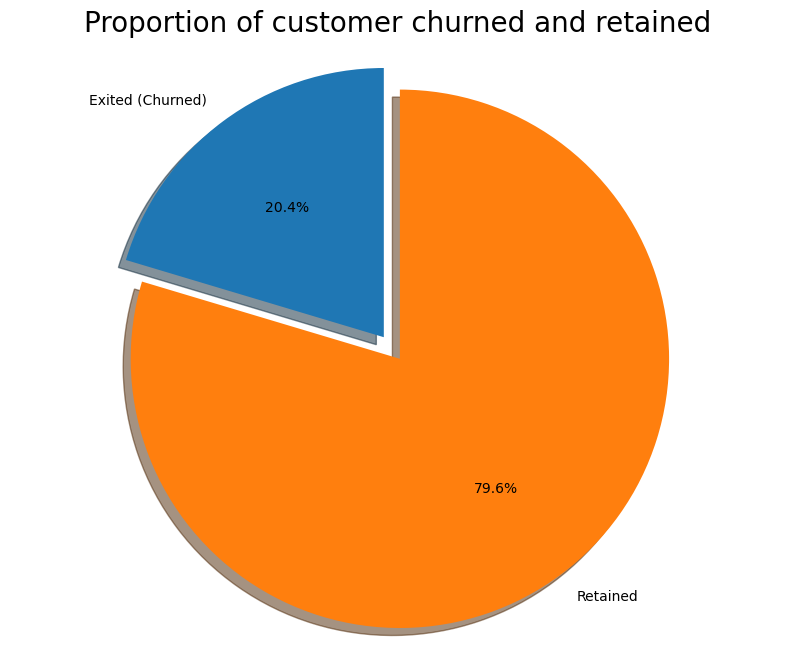

In [10]:
# Defining labels for the pie chart representing the two categories: 'Exited (Churned)' and 'Retained'
labels = 'Exited (Churned)', 'Retained'

# Counting the number of customers who have exited (churned) and those who have been retained
sizes = [
    df.Exited[df['Exited'] == 1].count(),  # Number of customers who exited
    df.Exited[df['Exited'] == 0].count()   # Number of customers who were retained
]

# The explode parameter is used to slightly separate the 'Retained' slice from the pie chart for better visualization.
explode = (0, 0.1)  # No explode for 'Exited', and slight explode (0.1) for 'Retained'

# Creating a subplot with specific figure size
fig1, ax1 = plt.subplots(figsize=(10, 8))

# Plotting the pie chart
ax1.pie(
    sizes,  # Sizes of the pie slices
    explode=explode,  # Explode setting
    labels=labels,  # Labels for the slices
    autopct='%1.1f%%',  # Display the percentage value with one decimal place
    shadow=True,  # Add a shadow to the pie chart for better visualization
    startangle=90  # Start the pie chart from a 90-degree angle
)

# Ensuring the pie chart is drawn as a circle
ax1.axis('equal')

# Adding a title to the pie chart
plt.title("Proportion of customer churned and retained", size=20)

# Displays the pie chart
plt.show()


Retained(0 or Blue)

Exited(0 or Orange)

This pie chart shows the number of customers who have churned and the the number of customers who have retained.
24.4% has exited the bank and 77.6 had retained

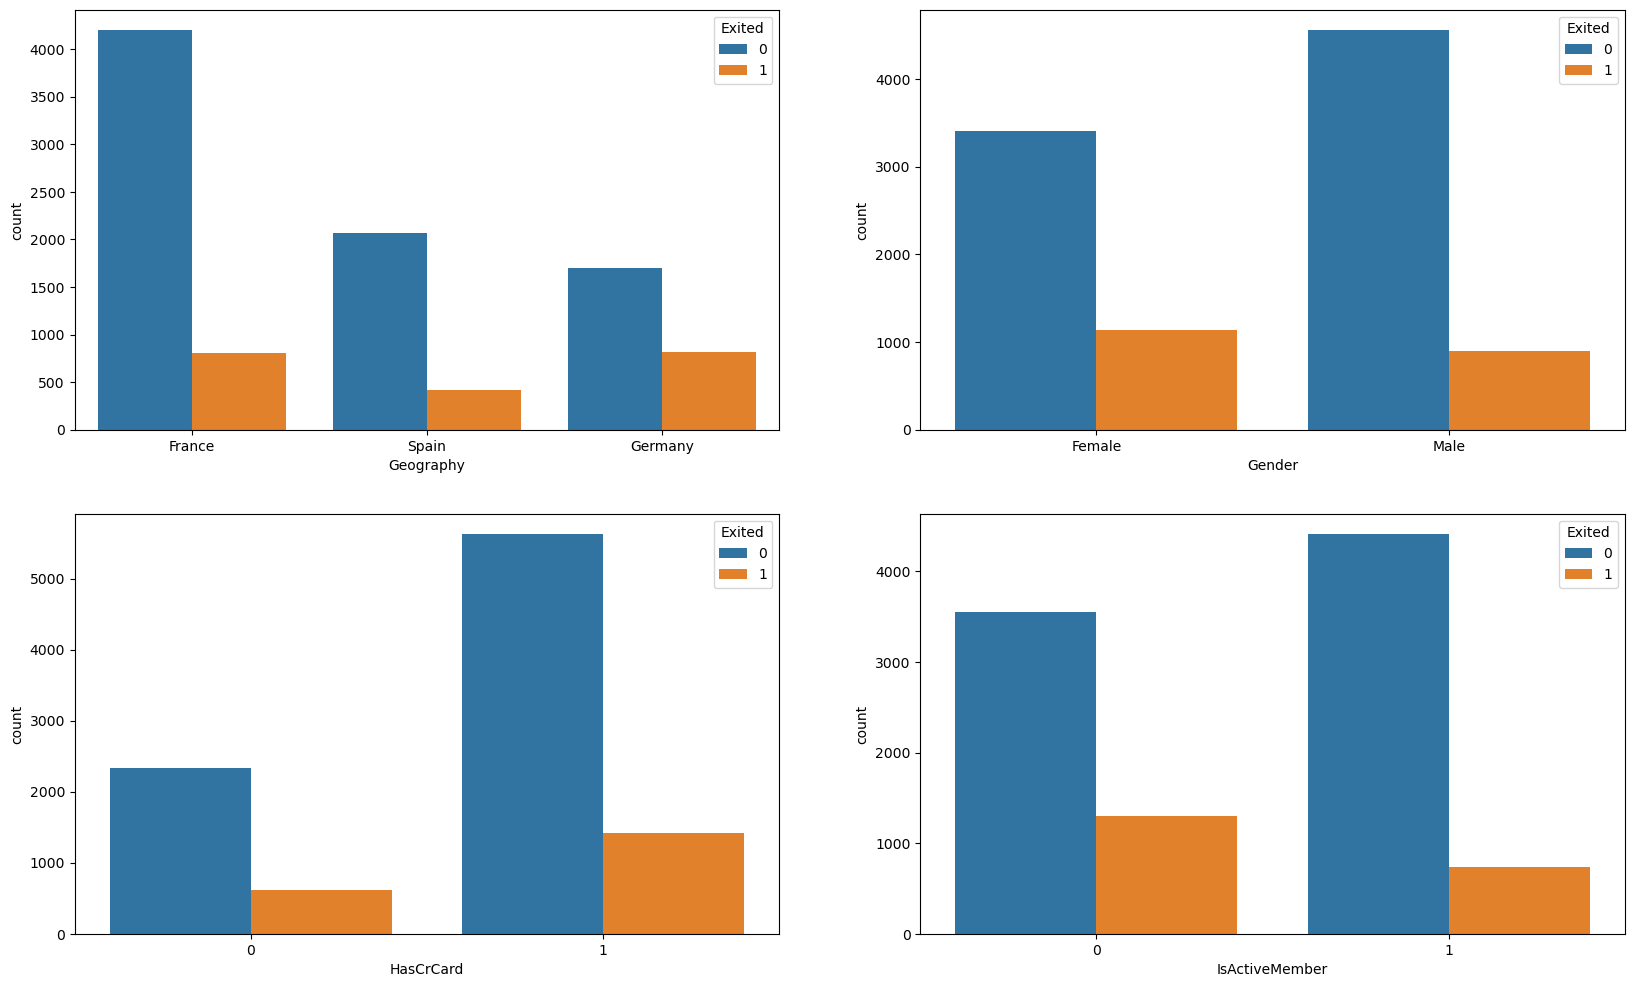

In [11]:

# Creating a 2x2 grid of subplots with a specified figure size
fig, axarr = plt.subplots(2, 2, figsize=(20, 12)) # Creates a 2x2 grid of subplots within the figure, setting the figure size to 20x12 inches.

# Plotting a count plot for the 'Geography' column with a hue based on the 'Exited' column
# This shows the distribution of customers across different geographies, split by whether they exited or not
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0]) # Places the plot in the first subplot of the grid.

# Plotting a count plot for the 'Gender' column with a hue based on the 'Exited' column
# This shows the distribution of customers based on gender, split by whether they exited or not
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1]) # Places the plot in the second subplot of the grid.

# Plotting a count plot for the 'HasCrCard' column with a hue based on the 'Exited' column
# This shows the distribution of customers based on whether they have a credit card, split by whether they exited or not
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0]) # Places the plot in the third subplot of the grid.

# Plot a count plot for the 'IsActiveMember' column with a hue based on the 'Exited' column
# This shows the distribution of customers based on their active membership status, split by whether they exited or not
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1]) # Places the plot in the fourth subplot of the grid.

# Display the plots
plt.show()



##### Findings

Retained(0 or Blue)

Exited(0 or Orange)

* Geography: 

    1. France

    •	Total Customers: Approximately 6,000

    •	Churned Customers: Approximately 700

    •	Churn Rate: 11.67%

    Analysis: France has the largest customer base among the three countries. Despite having the highest absolute number of churned customers, the churn rate is the lowest at 11.67%. This indicates strong customer retention relative to the total number of customers.


    2. Spain

    •	Total Customers: 2,000

    •	Churned Customers: 400

    •	Churn Rate: 20%

    Analysis: Spain has a moderate number of customers, with a churn rate of 20%. This suggests that one in five customers in Spain is churning. The country has room for improvement in customer retention strategies.

    3. Germany

    •	Total Customers: 1,700

    •	Churned Customers: 800

    •	Churn Rate: 47.06%

    Analysis: Germany has the fewest customers but the highest churn rate at 47.06%. Nearly half of the customers in Germany are churning, indicating a significant issue with customer retention. Immediate attention is required to address this high churn rate.

Recommendations
    
1.For France,the company should Continue current customer retention strategies and explore opportunities for customer expansion while maintaining retention.

2.For Spain, the company should implement targeted retention programs to reduce the churn rate and conduct customer satisfaction surveys to identify and address pain points.

3.For Germany,the company should conduct a thorough analysis to understand the high churn rate,develop and implement aggressive retention strategies and improve customer service and engagement efforts.Addressing these issues will be crucial for the company's overall growth and customer satisfaction.


Gender-Based Analysis
Male Customers: Approximately 4,500

Female Customers: Approximately 3,500

Male Churn: Approximately 900

Female Churn: Approximately 1,100

Analysis:
While the company has more male customers (4,500) than female customers (3,500), the churn rate among female customers is higher. Approximately 1,100 female customers have churned compared to 900 male customers.The higher churn rate among female customers (31.43%) compared to male customers (20%) suggests that female customers might be facing unique challenges or dissatisfaction that needs to be addressed.

Recommendations
The bank should: 

* investigate the reasons for higher churn among female customers through surveys and feedback.

* Develop targeted initiatives to address the specific needs and preferences of female customers.

* Enhance customer support and engagement tailored for female customers.

Credit Card Usage-Based Analysis

Customers with Credit Cards: Approximately 5,500
Churned Credit Card Customers: 1,600
Churn Rate for Credit Card Customers:1600

Analysis:
Out of the total customer base, 5,500 customers hold credit cards. Among these, 1,600 have churned, resulting in a churn rate of approximately 29.09%. This indicates a higher churn rate for credit card holders compared to the overall customer base.This is higher than the overall churn rates, indicating that credit card holders are more likely to churn.

Recommendations

For Credit Card Holder Retention,the bank should:

* Analyze the specific issues faced by credit card holders leading to higher churn.

* Improve the benefits and services associated with credit card usage.

* Offer personalized retention strategies and incentives for credit card holders.

Activity-Based Analysis

Inactive Customers: 3,500

Churned Inactive Customers: 1,200

Active Customers: 4,300

Churned Active Customers: 700

Analysis:
Among the customers, 3,500 are considered inactive, with a churn rate of approximately 34.29%. In contrast, there are 4,300 active customers with a churn rate of approximately 16.28%. This indicates that active customers are less likely to churn compared to inactive customers.


Recommendations

For Activity-Based Retention the bank should:

Implement re-engagement campaigns for inactive customers to reduce their high churn rate.

Provide incentives and personalized offers to encourage inactive customers to become active.

Continue to engage active customers with tailored content and offers to maintain their lower churn rate.


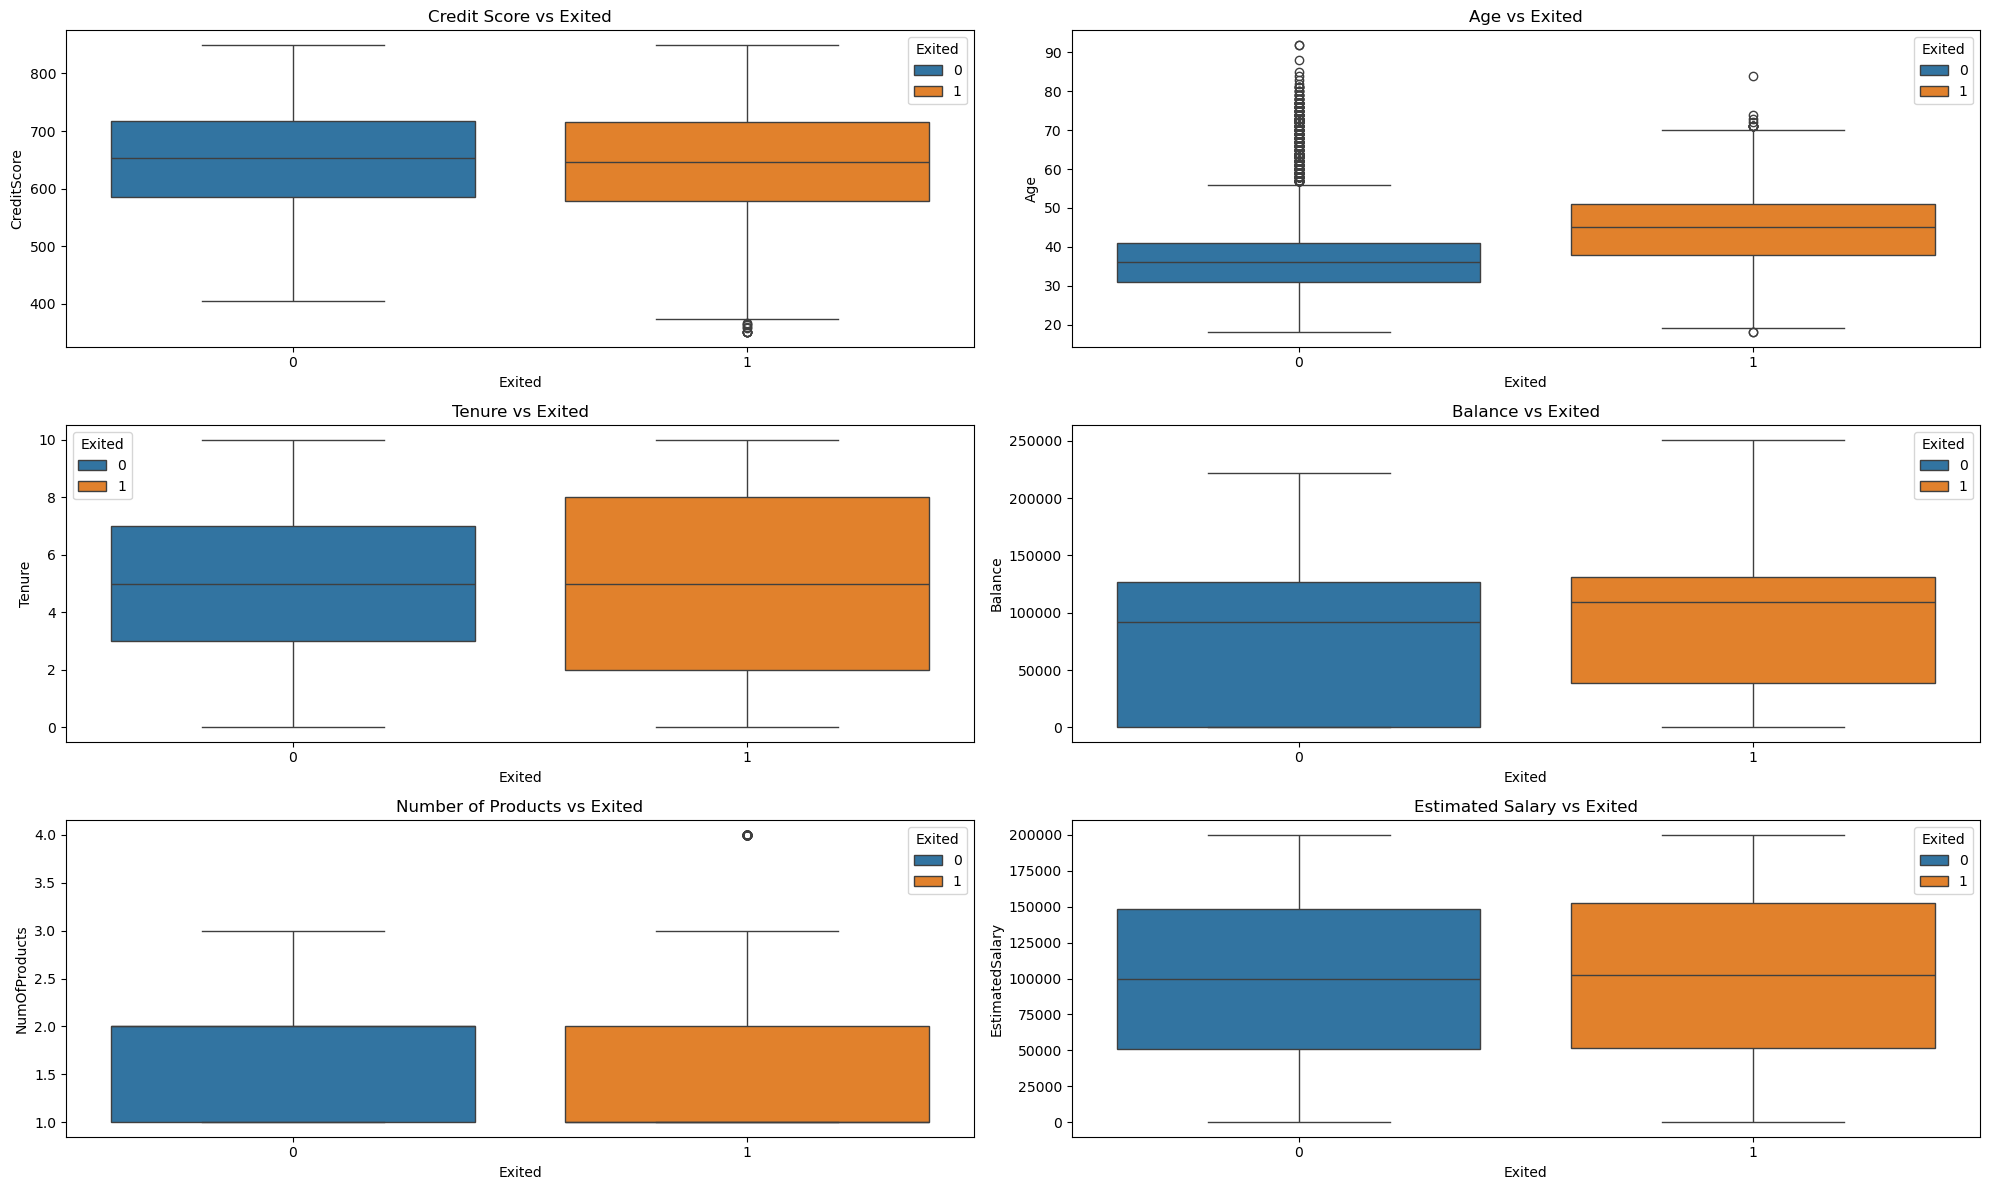

In [12]:
# Creating a 3x2 grid of subplots with a specified figure size
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

# Plotting a boxplot for the 'CreditScore' column with 'Exited' as the x-axis, and use 'Exited' for hue
# This shows the distribution of credit scores split by whether the customer exited or not
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0])
axarr[0][0].set_title('Credit Score vs Exited')

# Plotting a boxplot for the 'Age' column with 'Exited' as the x-axis, and use 'Exited' for hue
# This shows the distribution of age split by whether the customer exited or not
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1])
axarr[0][1].set_title('Age vs Exited')

# Plotting a boxplot for the 'Tenure' column with 'Exited' as the x-axis, and use 'Exited' for hue
# This shows the distribution of tenure split by whether the customer exited or not
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0])
axarr[1][0].set_title('Tenure vs Exited')

# Plotting a boxplot for the 'Balance' column with 'Exited' as the x-axis, and use 'Exited' for hue
# This shows the distribution of balance split by whether the customer exited or not
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1])
axarr[1][1].set_title('Balance vs Exited')

# Plotting a boxplot for the 'NumOfProducts' column with 'Exited' as the x-axis, and use 'Exited' for hue
# This shows the distribution of the number of products split by whether the customer exited or not
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0])
axarr[2][0].set_title('Number of Products vs Exited')

# Plotting a boxplot for the 'EstimatedSalary' column with 'Exited' as the x-axis, and use 'Exited' for hue
# This shows the distribution of estimated salary split by whether the customer exited or not
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1])
axarr[2][1].set_title('Estimated Salary vs Exited')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


Credit Score-Based Analysis

Analysis:
The analysis indicates that there is not much difference in churn rates between customers with different credit scores. This suggests that credit score is not a significant factor in determining whether a customer will churn or not. 

Recommendations

For Credit Score-Based Retention:

Since credit score is not a significant factor in churn, focus retention efforts on other more impactful factors.

Continue monitoring credit scores to ensure they do not become a significant factor in the future.

Age-Based Analysis

Analysis:
The age-based analysis shows that older customers, particularly those above 40 years of age, are more likely to churn. In contrast, customers aged between 30 and 40 are less likely to leave the bank. This suggests that age is a significant factor in customer retention, with older customers exhibiting higher churn rates.

Recommendations

For Age-Based Retention, the company should:

Develop specific strategies to retain older customers, who are more likely to churn.

Consider offering age-specific incentives, services, and support to better meet the needs of older customers.

Enhance engagement and communication efforts with older customers to improve their satisfaction and loyalty.

Tenure-Based Analysis

Analysis:
The tenure-based analysis reveals that customers who have been with the bank for 7 years and above (oldest customers) are more likely to churn. Similarly, new members who have been with the bank for a year or two are also more likely to churn. In contrast, customers who have been with the bank for an average of 4 to 6 years are less likely to leave. This suggests that both new and long-term customers are at higher risk of churn compared to mid-tenure customers.

Recommendations

For Tenure-Based Retention, the bank should:

Develop strategies to better retain both new and long-term customers, who are at higher risk of churn.

Implement onboarding programs and personalized support for new customers to enhance their early experience.

Recognize and reward long-term customers to maintain their loyalty and reduce the risk of churn.

Focus on maintaining the satisfaction and engagement of mid-tenure customers who show lower churn rates.


Balance-Based Analysis

Analysis:
The balance-based analysis indicates that customers with lower balances (0 to 90,000) are less likely to churn. Conversely, customers with higher balances (50,000 to 140,000) are more likely to churn. This suggests that both ends of the balance spectrum—those with very low and very high balances—are at higher risk of churn, whereas customers with moderate balances tend to remain with the bank.

Recommendations
Provide personalized financial planning services to help them improve their financial health.

Provide exclusive benefits or perks for maintaining high balances, such as premium banking services or VIP treatment.

Implement proactive communication to keep them informed about relevant products or services.

Develop programs to help customers optimize their account balances, such as balance transfer promotions or consolidation options.

number-of-product-based analysis

indicates that there is not much difference in churn rates between customers with number of products
This suggests that number of product is not a significant factor in determining whether a customer will churn or not. 

Recommendations
Explore innovative approaches to differentiate products and services in a competitive market landscape.

Estimated salary-based analysis
indicates that there is not much difference in churn rates between customers with estimated salary
This suggests that estimated salary is not a significant factor in determining whether a customer will churn or not. 

#### Feature Engineering

(-1.0, 5.0)

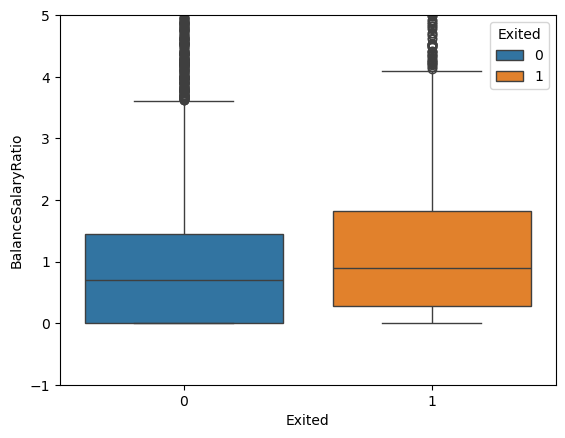

In [13]:
# Making a new column BalanceSalaryRatio
"""
Upon analysis, It was observed that neither the balance nor the estimated salary alone had a significant impact on customer churn.To explore the combined effect, a ratio of balance to estimated salary was calculated for each customer.
A box plot of this ratio was created to assess its relationship with churn.
"""
# Calculating the balance to salary ratio and adding it as a new column 'BalanceSalaryRatio' in the DataFrame
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Creating a boxplot to visualize the distribution of balance to salary ratio for customers who churned and those who didn't
# The x-axis represents the 'Exited' status, and the hue differentiates between churned and retained customers
# Set the y-axis limit to -1 and 5 for better visualization
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df)
plt.ylim(-1, 5)  # Set the y-axis limit


Findings:The box plot analysis indicates that customers with a balance-to-salary ratio around 2 are more likely to churn.

Recommendations:
Develop personalized communication and engagement strategies for customers with a balance-to-salary ratio around 2.

Provide tailored financial advice or offers to improve their satisfaction and reduce the likelihood of churn.

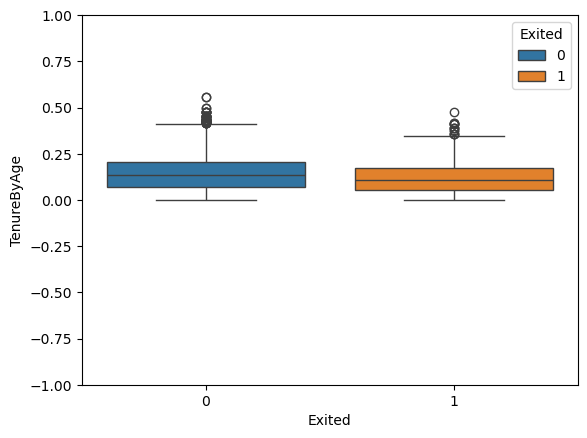

In [14]:
# Calculating the tenure to age ratio and adding it as a new column 'TenureByAge' in the DataFrame
"""
df['TenureByAge']: Creates a new column in the DataFrame to store the calculated ratios.
df['Tenure']: Accesses the Tenure column in the DataFrame.
df['Age']: Accesses the Age column in the DataFrame.
df['Tenure'] / df['Age']: Performs element-wise division to calculate the tenure to age.
df['TenureByAge']: Creates a new column in the DataFrame to store the calculated ratios.
"""
df['TenureByAge'] = df['Tenure'] / df['Age'] # Performs element-wise division to calculate the tenure to age ratio.

# Creating a boxplot to visualize the distribution of tenure to age ratio for customers who churned and those who didn't
# The x-axis represents the 'Exited' status, and the hue differentiates between churned and retained customers
# Set the y-axis limit to -1 and 1 for better visualization
"""
y='TenureByAge': The TenureByAge column will be on the y-axis.
x='Exited': The Exited column will be on the x-axis.
hue='Exited': Colors the boxes based on the Exited status.
data=df: Specifies the DataFrame df as the data source
"""
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df)
plt.ylim(-1, 1)  # Set the y-axis limit

# Display the plot
plt.show()


TenureByAge Ratio:

Analysis shows no significant relationship between the TenureByAge ratio and churn.

Most customers have a TenureByAge ratio between 0.00 and 0.25, indicating minimal variation.

Recommendations:

For younger customers with low tenure, implement onboarding programs that emphasize long-term benefits and loyalty programs.

For older customers with long tenure, offer rewards and recognition programs to reinforce their loyalty.

Provide financial planning services that cater to their stage in life, such as retirement planning.


#### Printing the categorical variables

In [15]:
def print_unique_col_values(df):
    # Iterate over each column in the DataFrame
    for column in df:
        # Check if the column's data type is 'object' (usually indicates categorical data)
        if df[column].dtypes == 'object':
            # Print the column name and its unique values
            print(f'{column}: {df[column].unique()}')
            
print_unique_col_values(df)


Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

Label encoding is a common technique used to convert categorical data into a numerical format that can be more easily understood and processed by machine learning algorithms. Many algorithms require numerical input and cannot directly handle categorical data.

The reason Why i am performing label encoding is most machine learning models, such as logistic regression, support vector machines, and neural networks, require numerical input. They cannot process categorical data directly because they perform mathematical operations on the input data, which requires numerical values.

In [16]:
# Replacing the values in the 'Gender' column: 'Male' with 1 and 'Female' with 0
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)


### One Hot Encoding method

In one-hot encoding, each category value is converted into a new binary column (or feature) where 1 indicates the presence of the category and 0 indicates the absence. This creates a binary matrix where each column corresponds to one category and each row corresponds to one observation which allows categorical data to be used more effectively in machine learning models, where numerical inputs are preferred.

In [17]:
# Creating a new DataFrame 'df1' with one-hot encoded columns for the 'Geography' column
"""
pd.get_dummies: This function from the Pandas library is used to perform one-hot encoding.
data=df: Specifies the DataFrame df as the data source.
columns=['Geography']: Specifies the column(s) to be one-hot encoded. In this case, it's the 'Geography' column.
"""
df1 = pd.get_dummies(data=df, columns=['Geography'])

# Displaying the first few rows of the new DataFrame 'df1'
df1.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,False,False,True


The 'Geography' column has been replaced with three new columns: 'Geography_France', 'Geography_Germany', and 'Geography_Spain'.

Each new column is binary, indicating the presence or absence of the corresponding country for each row.

For example, in the first row, 'Geography_France' is True, indicating that the customer is from France, while 'Geography_Germany' and 'Geography_Spain' are False.


Performing Min-Max scaling on selected numerical variables in the DataFrame df1.Min-Max scaling (also known as normalization) transforms the features so that they have a minimum value of 0 and a maximum value of 1.This scaling method is used when the data needs to be on a similar scale but still retain the relative differences between values.

Scikit-learn is used for tasks like classification, regression, clustering, dimensionality reduction, and more. It includes various algorithms and tools for preprocessing data, feature selection, model evaluation, and model selection. 

In [18]:
# Listing of variables to scale
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

# Importing the MinMaxScaler module from scikit-learn library
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler
scaler = MinMaxScaler()

# Scaling the specified columns (scale_var) in the DataFrame (df1)
df1[scale_var] = scaler.fit_transform(df1[scale_var])

df1.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,True,False,False
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,False,False,True
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,True,False,False
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,True,False,False
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,False,False,True


After scaling, the numerical columns are transformed. For example, CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary now have values between 0 and 1, where 0 represents the minimum value in the original column, and 1 represents the maximum value. The categorical columns remain unchanged.

For instance, CreditScore originally ranged from 350 to 850. After scaling, the minimum value becomes 0 and the maximum becomes 1, with other values scaled accordingly within that range.

This transformation makes the numerical features comparable and removes the potential bias introduced by differences in the scale of the original features. This preprocessing step is often performed to improve the performance and stability of machine learning models.

### Preparing data for a machine learning model

In [19]:
# Separating independent features (X) and dependent feature (y)
"""
X: Contains the independent features. It's created by dropping the 'Exited' column from the DataFrame df1.
y: Contains the dependent feature, which is the 'Exited' column from the DataFrame df1.
X = df1.drop('Exited', axis='columns'): This line creates a new DataFrame X by dropping the column labeled 'Exited' from the DataFrame df1. The parameter axis='columns' specifies that we want to drop a column (as opposed to dropping a row), and dropping by label ('columns') means we are specifying the name of the column to drop.
"""
X = df1.drop('Exited', axis='columns')  # Independent features (excluding the 'Exited' column)
y = df1['Exited']  # Dependent feature (the 'Exited' column)

# Importing the train_test_split function from scikit-learn
# sklearn.model_selection is used to split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# The test_size parameter specifies the proportion of the dataset to include in the test split (here, 20%)
# The random_state parameter sets the random seed for reproducibility
"""
X_train: Contains the independent features for training.
X_test: Contains the independent features for testing.
y_train: Contains the dependent feature for training.
y_test: Contains the dependent feature for testing.
train_test_split(X, y, test_size=0.2, random_state=5): This function splits the dataset into training and testing sets.
X: The independent features.
y: The dependent feature.
test_size=0.2: Specifies that 20% of the data will be used for testing, while 80% will be used for training.
random_state=5: Sets the random seed to 5 for reproducibility, ensuring that the same random split is obtained each time the code is run.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


The ultimate goal of a machine learning model is to generalize well to unseen data. Splitting the dataset into training and testing sets helps ensure that the model is not biased towards the specific instances in the training set and can make accurate predictions on new data.

In [20]:
# Finding out how many features are present in the training dataset X_train
len(X_train.columns)



14

## Model Building and Prediction

### The Sequential model

The Sequential model is a linear stack of layers in deep learning, particularly in the context of Keras, a high-level neural networks API written in Python and capable of running on top of TensorFlow.

## The Sequential model is not appropriate when:

Your model has multiple inputs or multiple outputs.

Any of your layers has multiple inputs or multiple outputs.

You need to do layer sharing.

You want non-linear topology, such as a residual connection or a multi-branch model.

In these cases, you would typically use the Functional API or subclassing in Keras, which provide more flexibility and control over the model architecture.

In [24]:
# Importing TensorFlow and Keras
"""
TensorFlow is the open-source machine learning library developed by Google, and Keras is an API that runs on top of TensorFlow, 
providing a high-level interface for building and training neural networks.
"""
import tensorflow as tf
from tensorflow import keras

# Defining the model architecture
"""
The neural network model is defined using the Sequential API from Keras. This model consists of three layers:
Input layer: Dense layer with 12 neurons and input shape (14,). This layer uses ReLU (Rectified Linear Unit) activation function.
Hidden layer: Dense layer with 6 neurons and ReLU activation function.
Output layer: Dense layer with 1 neuron and Sigmoid activation function. Sigmoid is used for binary classification tasks as it squashes the output between 0 and 1, making it suitable for probability predictions.
"""
model = keras.Sequential([
    keras.layers.Input(shape=(14,)),  # Correctly specifying input shape
    keras.layers.Dense(12, activation='relu'),  # Input layer with 12 neurons, using ReLU activation
    keras.layers.Dense(6, activation='relu'),  # Hidden layer with 6 neurons, using ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron, using Sigmoid activation for binary classification
])

# Compiling the model
"""
Before training, the model needs to be compiled. During compilation, i specified the optimizer, loss function, and metrics to be used during training.
optimizer='adam': Adam optimizer, a popular optimization algorithm.
loss='binary_crossentropy': Binary cross-entropy loss function, commonly used for binary classification tasks.
metrics=['accuracy']: Accuracy metric will be monitored during training.
"""
model.compile(optimizer='adam',  # Optimizer algorithm
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])  # Evaluation metric to monitor during training

# Training the model
"""
The model is trained using the fit method. It takes the training data (X_train and y_train) and the number of epochs (how many times the model will see the entire training dataset).
"""
model.fit(X_train, y_train, epochs=100)  # Training the model with X_train and y_train for 100 epochs


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7321 - loss: 1.0291
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8032 - loss: 0.5549
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.4636
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4703
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.4537
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4465
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4827
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8123 - loss: 0.4386
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8068 - loss: 0.4941
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8182 - loss: 0.4276
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8196 - loss: 0.4190
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [25]:
# Evaluating the trained model on the test data to assess its performance.
# X_test: the input features of the test dataset
# y_test: the corresponding true labels of the test dataset
model.evaluate(X_test, y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8402 - loss: 0.3665


[0.36204302310943604, 0.8495000004768372]

In [26]:
# making prediction using machine learning model
"""model: This is your trained machine learning model.
predict(): This method is used to make predictions based on the input data provided.
X_test: This is the test dataset that you are using to evaluate the model's performance.
yp: This variable stores the predictions made by the model.
"""
yp = model.predict(X_test)
yp

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.02982477],
       [0.09530309],
       [0.04265922],
       ...,
       [0.01150953],
       [0.00882829],
       [0.07026851]], dtype=float32)

Binary Classification Predictions Based on a Threshold 0,1 To Check Accuracy

In [27]:
# Initializing an empty list to store the predictions
y_pred = [] # Initializes an empty list named y_pred. This list will be used to store the final predictions.

# Iterating over each element in the list yp
for element in yp: # Starts a loop that iterates over each element in the list yp.
    # Checking if the current element is greater than 0.5.
    if element > 0.5: # Checks if the current element in the list yp is greater than 0.5.
        # If the element is greater than 0.5, append 1 to y_pred
        y_pred.append(1) # If the current element is greater than 0.5, it appends the value 1 to the list y_pred.
    else: # If the current element is not greater than 0.5 (i.e., it is less than or equal to 0.5), the code proceeds to the next step.
        # If the element is less than or equal to 0.5, append 0 to y_pred
        y_pred.append(0) # If the current element is less than or equal to 0.5, it appends the value 0 to the list y_pred.


In [28]:
# Listing Prediction Outcome. 1 means the person has churned and 0 means the person has not churned
y_pred


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


### Checking the accuracy 

In [29]:
# Importing the confusion_matrix and classification_report functions from sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report

# Printing the classification report to evaluate the performance of the classification model
# y_test: ground truth (correct) labels
# y_pred: predicted labels by the classification model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.67      0.50      0.57       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



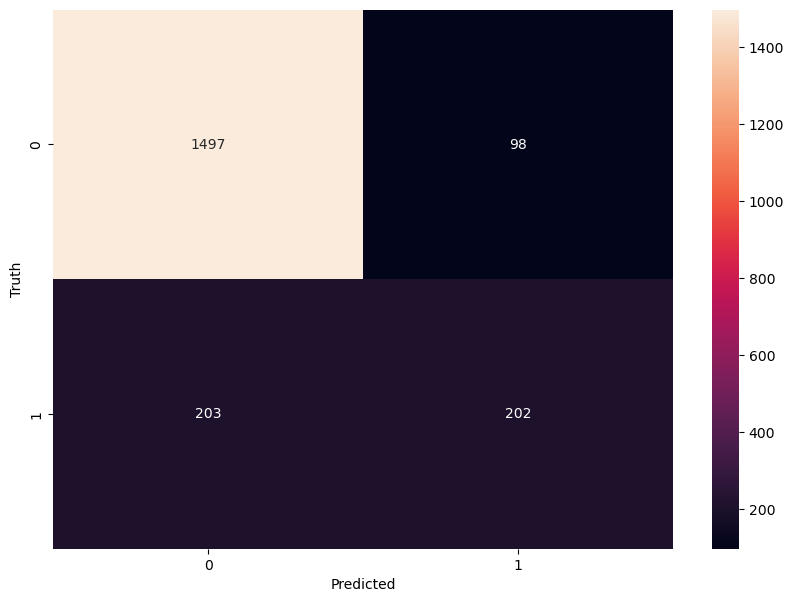

In [30]:
# Importing seaborn as sn for data visualization and TensorFlow for computing the confusion matrix
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Compute the confusion matrix using TensorFlow
# labels=y_test: ground truth (correct) labels
# predictions=y_pred: predicted labels by the classification model
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Creating a plot with a specified size
plt.figure(figsize=(10, 7))

# Using seaborn to create a heatmap for the confusion matrix
# cm: the confusion matrix to be visualized
# annot=True: write the data value in each cell
# fmt='d': format the annotations as integers
sn.heatmap(cm, annot=True, fmt='d')

# Label the x-axis as 'Predicted'
plt.xlabel('Predicted')

# Label the y-axis as 'Truth'
plt.ylabel('Truth')

# Display the plot
plt.show()


In [31]:
# Importing accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [36]:
# Printing the accuracy score
"""
Accuracy score is:This is a string that will be printed as is.

accuracy_score(y_test,y_pred): This part calculates the accuracy score. accuracy_score is a function from a machine learning library like scikit-learn. It takes two parameters:

y_test: This is the true labels or target values of the test dataset.

y_pred: This is the predicted labels or target values generated by a machine learning model for the test dataset.

*100: This multiplies the accuracy score by 100 to convert it into a percentage. The accuracy score is typically a fraction or decimal between 0 and 1, and multiplying by 100 converts it into a percentage.

The:.2f inside the curly braces specifies that the accuracy should be displayed as a floating-point number with two decimal places.

"%": This is another string, representing the percentage sign that will be printed after the accuracy score.
"""
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy score is: {accuracy:.2f}%")

Accuracy score is: 84.95%
